# Exercise 1: Explore a dataset using pandas and seaborn

## Pandas and seaborn Refresher

Let's review using Seaborn and Pandas to load up some data and then pair plot it.

We'll be using the same tools that we used last week for this 
- [pandas](pandas.pydata.org) for data handling (our dataframe library)
- [seaborn](seaborn.pydata.org) for _nice_ data visualization

Shortly we'll also by trying out:

- [scikit-learn](scikit-learn.org) an extensive machine learning library.
- [numpy](numpy.org) - a fundamental maths library best used by people with a strong maths background.  We won't explore it much today, but it does have some useful methods that we'll need.  It underlies all other mathematical and plotting tools that we use in Python.

We'll be using scikit-learn over the next few weeks, and it's well worth reading the documentation and high level descriptions.

_You will probably want to take a moment to look at the documentation of the libraries above - especially pandas_

The other useful resource is Stack Overflow - if you have a question that sounds like 'how do I do {x}' then someone will probably have answered it on SO. Questions are also tagged by library so if you have a particular pandas question you can do something like going to https://stackoverflow.com/questions/tagged/pandas (just replace the 'pandas' in the URL with whatever library you're trying to use.

Generally answers on SO are probably a lot closer to getting you up and running than the documentation. Once you get used to the library then the documentation is generally a quicker reference. We will cover strategies for getting help in class.

## Git links

If you want to work in pairs, use GitHub and GitKraken to share code. Here are some useful links for reference:

- GitKraken interface basics: https://support.gitkraken.com/start-here/interface
- Staging and committing (save current state -> local history): https://support.gitkraken.com/working-with-commits/commits
- Pushing and pulling (sync local history <-> GitHub history): https://support.gitkraken.com/working-with-repositories/pushing-and-pulling
- Forking and pull requests (request to sync your GitHub history <-> someone else's history - requires a _review_):
  - https://help.github.com/articles/about-forks/
  - https://help.github.com/articles/creating-a-pull-request-from-a-fork/

## Step 1: Read in the dataset

For this exercise, we will be using the Beijing PM2.5 Data Set, which contains meteorological data from Beijing Capital International Airport and atmospheric particulate matter (PM) that have a diameter of less than 2.5 micrometers.

All the packages you need for the exercise are already there, just run the cell.

In [1]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

First, we need to download the data into the folder *data*. Define *filename*, which provide the path to the folder *data* and the name of the file (you can use the same name as in the URL).

In [2]:
filename = '../data/PRSA_data_2010.1.1-2014.12.31.csv'

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv'
urllib.request.urlretrieve(url, filename)

('../data/PRSA_data_2010.1.1-2014.12.31.csv',
 <http.client.HTTPMessage at 0x124a9ee50>)

Read the file using pandas and *filename*.

In [3]:
df = pd.read_csv(filename)

## Step 2: Explore the dataset

Look at the content of the data frame.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [5]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [6]:
df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

Look at the summary statistics of each variable using pandas.

In [7]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


Use seaborn to plot a pairplot of all the variables in the data frame.

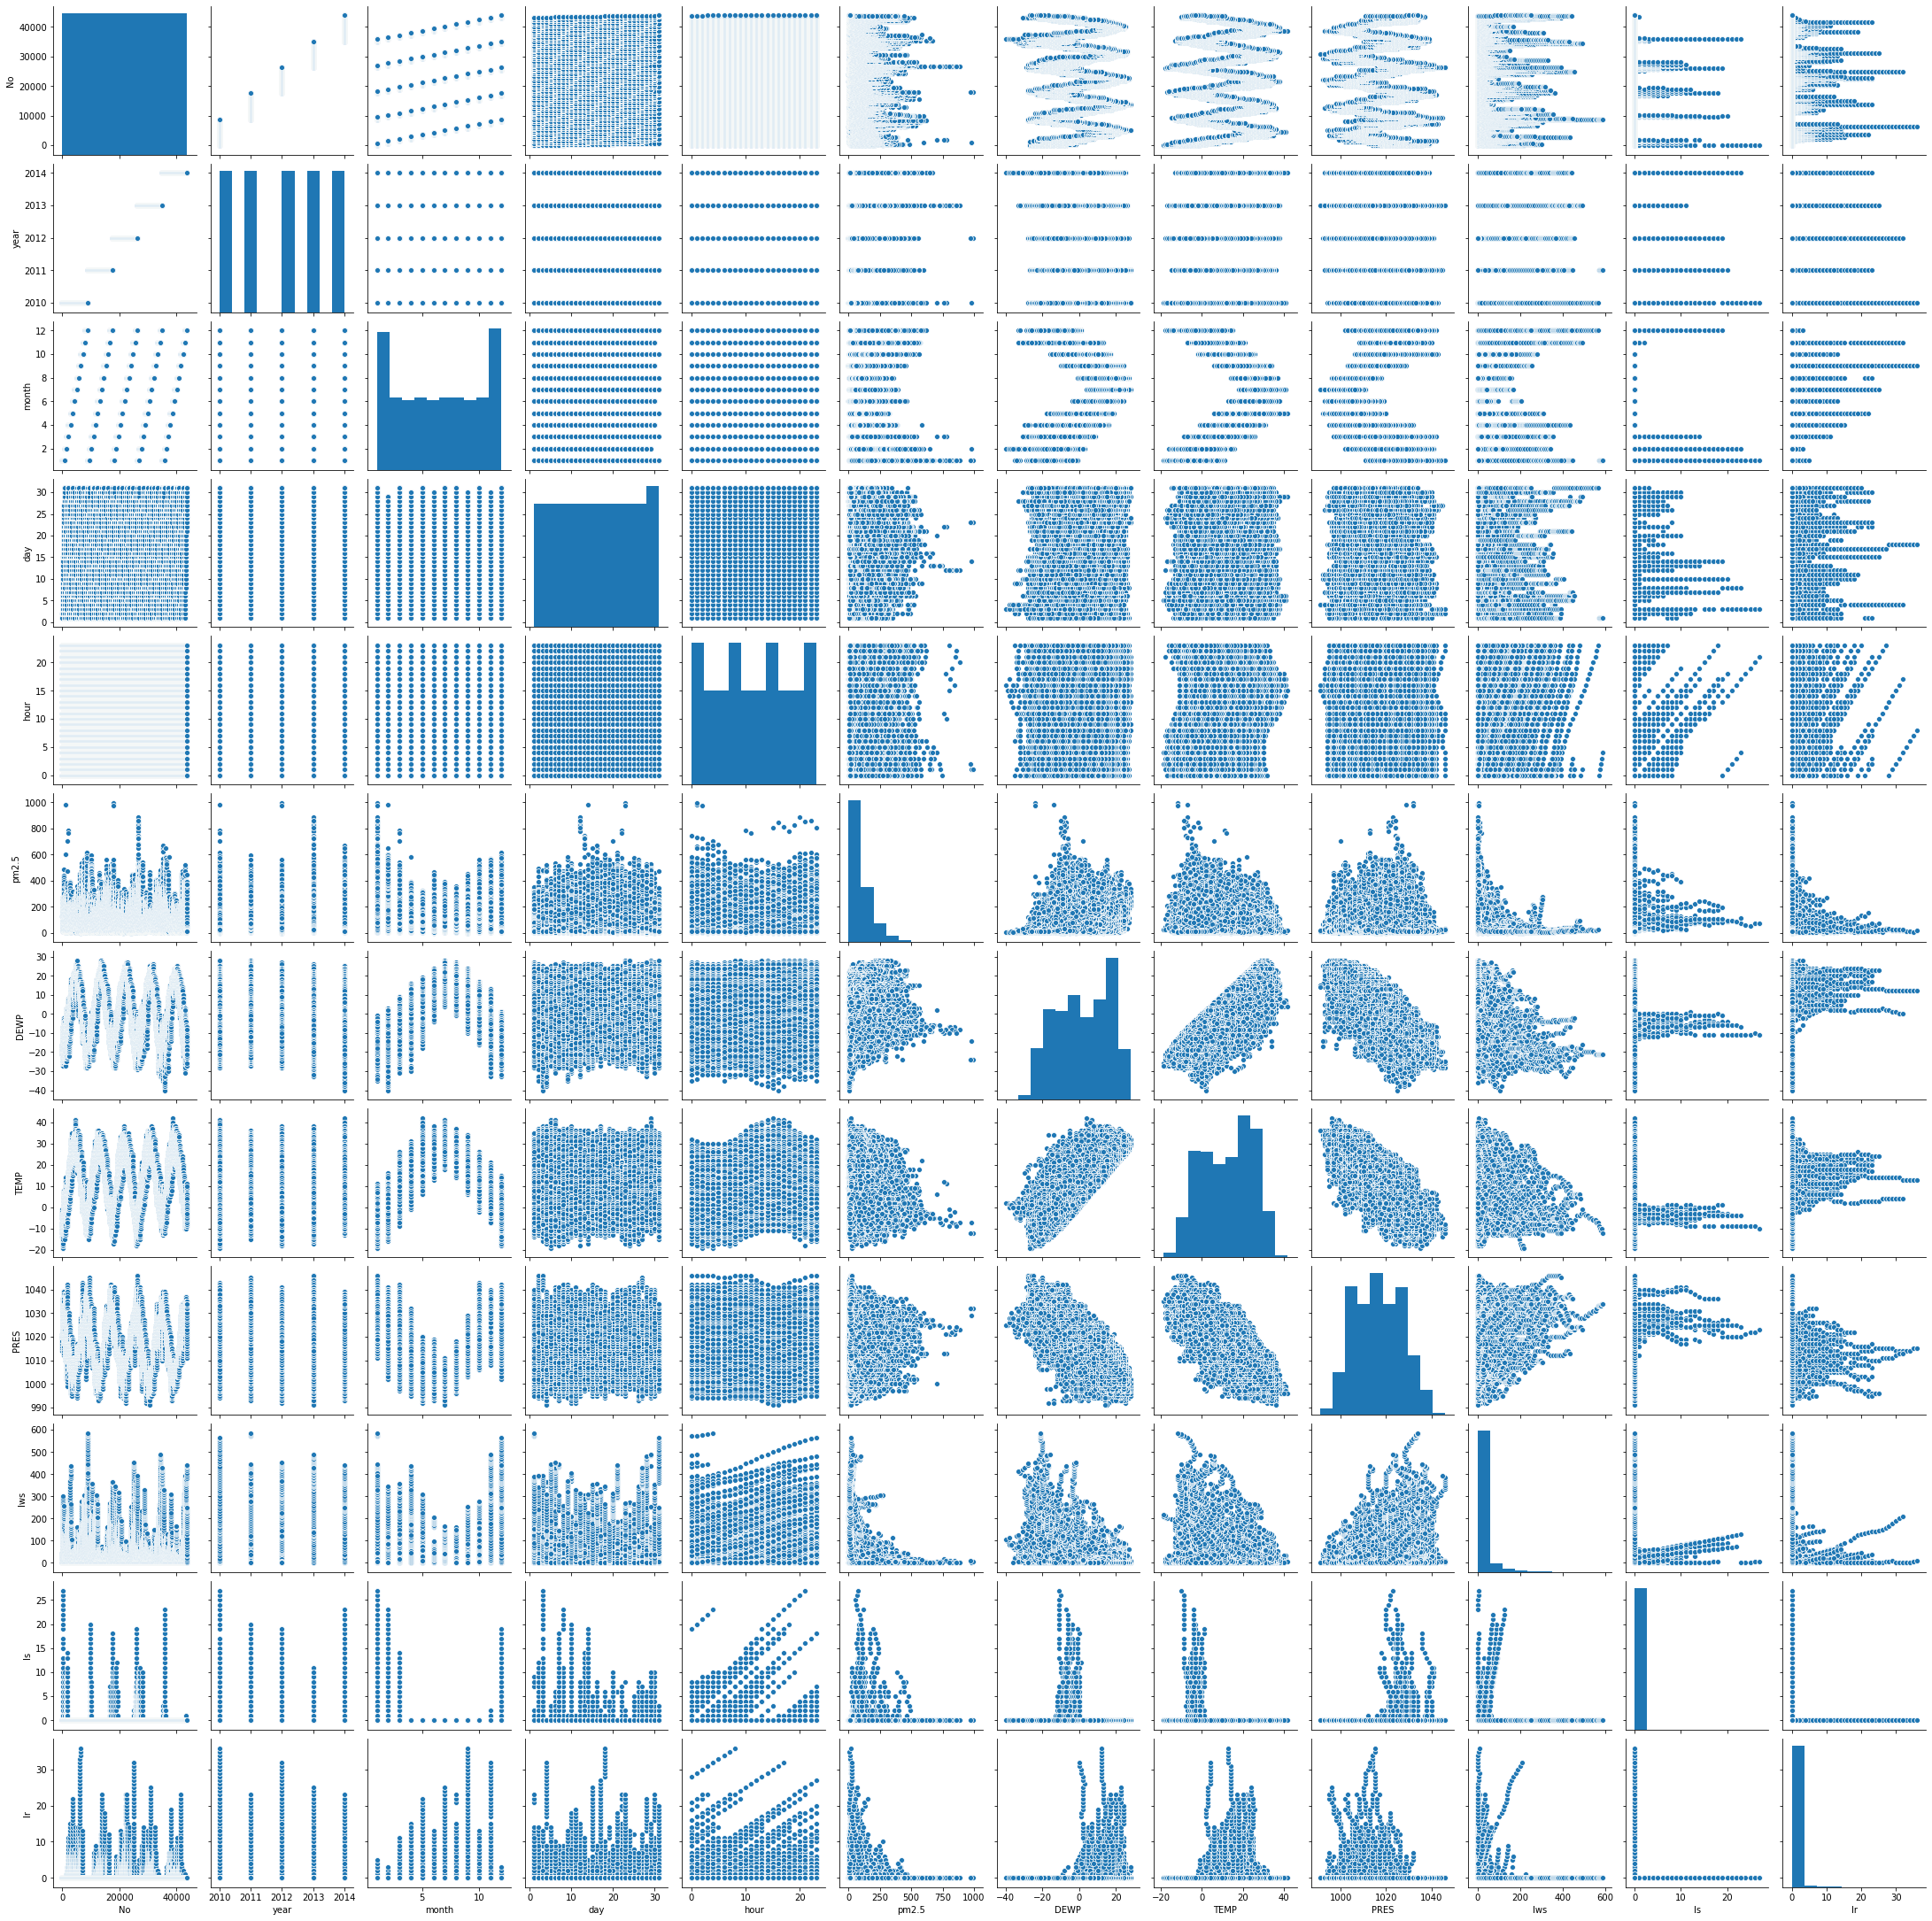

In [8]:
sns.pairplot(df)

## Step 3: Focus on the variables of interest

This part is slightly biased, because our goal is to perform a linear regression, and it turns out two variables show a nice linear relationship.

Find those two variables and plot their distributions using pandas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13a68d3d0>,
      dtype=object)

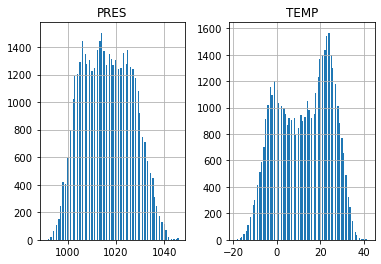

In [9]:
df.hist(column=['TEMP', 'PRES'], bins=100)

Now, plot the variation of one variable compared to the other using pandas.

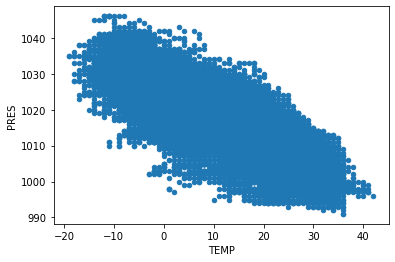

In [10]:
df.plot(x='TEMP', y='PRES', kind='scatter')

Using pandas or seaborn, check the correlation between those two variables.

In [11]:
df.corr()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
No,1.000000,9.797958e-01,1.993007e-01,1.880803e-02,5.471695e-04,-0.017706,0.047668,0.078159,-0.024224,-0.062427,-0.029464,-0.016563
year,0.979796,1.000000e+00,-3.575502e-16,-1.663879e-16,0.000000e+00,-0.014690,0.001122,0.045529,-0.012570,-0.064244,-0.017002,-0.024383
month,0.199301,-3.575502e-16,1.000000e+00,1.079604e-02,-1.528210e-17,-0.024069,0.233975,0.170093,-0.062185,0.003043,-0.061672,0.036737
day,0.018808,-1.663879e-16,1.079604e-02,1.000000e+00,-4.046030e-19,0.082788,0.028559,0.014791,-0.007070,-0.008954,-0.036826,0.002681
hour,0.000547,0.000000e+00,-1.528210e-17,-4.046030e-19,1.000000e+00,-0.023116,-0.020988,0.150066,-0.041928,0.056618,-0.002374,-0.006286
pm2.5,-0.017706,-1.469020e-02,-2.406878e-02,8.278849e-02,-2.311644e-02,1.000000,0.171423,-0.090534,-0.047282,-0.247784,0.019266,-0.051369
DEWP,0.047668,1.121574e-03,2.339746e-01,2.855899e-02,-2.098769e-02,0.171423,1.000000,0.824633,-0.778346,-0.296399,-0.034410,0.125090
TEMP,0.078159,4.552854e-02,1.700926e-01,1.479104e-02,1.500656e-01,-0.090534,0.824633,1.000000,-0.826690,-0.154623,-0.092601,0.049121
PRES,-0.024224,-1.257001e-02,-6.218507e-02,-7.070048e-03,-4.192788e-02,-0.047282,-0.778346,-0.826690,1.000000,0.185355,0.069028,-0.079843
Iws,-0.062427,-6.424368e-02,3.043299e-03,-8.953566e-03,5.661776e-02,-0.247784,-0.296399,-0.154623,0.185355,1.000000,0.021883,-0.010122


## Step 4: Find a linear regression with Seaborn

Now that you've seen a linear relationship between two of the variables, use Seaborn to plot the line of best fit.

There are a few different ways to do this. Try using regplot.

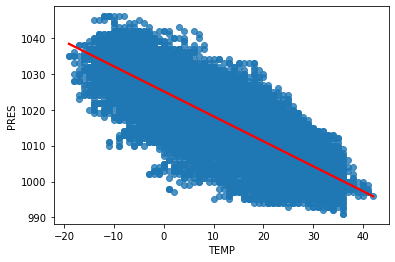

In [12]:
sns.regplot(x='TEMP', y='PRES', data=df, line_kws={"color": "red"})

# Exercise 2: Linear regression with scikit-learn

Scikit-learn provides machine learning tools in several categories. These include supervised learning and unsupervised learning. We'll start working with unsupervised learning next week. Supervised learning is about finding a model for features that can be measured and some labelling that we have for the available data. If, for example, we have lithium assays and we want to try to predict lithium based on sensor data from a portable spectrometer, then the lithium assays are the labels and the measured intensities at different wavelengths are the measured features. This kind of supervised learning is called regression.

There's another kind of supervised learned which is called classification, this is what we're doing when we want to assign observed data to different discrete classes. Regression can sometimes be used, with minor additions, to classify data as well. For example, with our lithium spectral regression model we could classify samples as being high in lithium or low in lithium simply by using a threshold value that we set. There are more sophisticated ways to classify, which will be covered in later weeks.

We use the estimator API of scikit-learn to do regression.

## The Estimator API of scikit-learn

There are a few steps to follow when using the estimator API.  These steps are the same for all methods that scikit-learn implements, not just for linear regression.

1. Choose a class of model by importing the appropriate estimator class. In our case we want to import Linear Regression. Scikit-learn's documentation might come in handy for that.

First, import LinearRegression from scikit-learn.

In [13]:
from sklearn.linear_model import LinearRegression

Now create an "instance" of the LinearRegression class.

In [14]:
model = LinearRegression()

To check that this has worked look at the model object after it's created. It should tell you about some of its settings.

In [15]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

These settings are also called hyperparameters.  We'll encounter hyperparameters again next week, and will talk about them in more detail then.  They're often very important in working out whether our model is well fitted to the data.

2. Next we need to arrange a pandas dataframe into a features matrix and a target vector.

Search on the Internet for this, and use the two variables identified during the previous exercise.  I know that Stack Overflow will be helpful.  You will need to look at the column names in the dataframe to find the names of the two columns that are important to us.  Do this in the next cell.

The notation is a bit strange!  The two pairs of "[ ]" as "[[ ]]" that you will see is correct.

In [16]:
x = df[['TEMP']]
y = df['PRES']

3. Fit the model to your data by using the fit() method of the LinearRegression object.

Again, look at the documentation for how to apply this.  You'll need to provide your features matrix (X) and target vector (y) as parameters to the fit method.

In [17]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Congratulations you've trained your first machine learning model!

As this is a two dimensional linear model, it has two parameters.  The line's intercept and slope.  The notation that scikit-learn uses is a little unfriendly.  Its convention is to add underscores to the names of the parameters it finds.  Also, it calls the slope "coef".

After fitting the model, find the coefficient and intercept of the model.

In [18]:
model.coef_, model.intercept_

(array([-0.69590155]), 1025.1105995591565)

You can also look at the coefficient of determination of the model, R<sup>2</sup>.

In [19]:
model.score(x, y)

0.6834169402193739

#### Now that we've trained a model, we should make predictions!

6. Make predictions!

This is also more complicated with scikit-learn than it is with Seaborn.

For a given, single value for a feature (i.e., a temperature) we can predict a label.  For example, for a temperature of 20 &deg;C, we could make a prediction with:

```predicted_pressure = model.predict(20)```

But to find the smooth line that seaborn finds we need to explicitly tell scikit-learn that we want to do a prediction for all of the temperatures that we're interested in. To do this we
use a new library called "numpy" and a method called linspace (which is short for linear spacing).

First we need to import numpy.

```import numpy as np```

While I used predicted_pressure above as an example of a predicted target array, and 20 is an example of x, I'll now switch to the usual y and x conventions used in tutorials with scikit-learn.  You can of course use any variables names you, and in your own code it's best to use descriptive names that mean something in the domain of your industry, like 'predicted_pressure", or "octane_rating".

We need to use the linspace method in numpy.  Use it like this:

```x_fit = np.linspace(-20, 40)```

This will create a collection of temperatures, in order, starting from -20 &deg;C up to 40 &deg;C.  This is what we need, but this collection isn't formatted correctly for scikit-learn.  To make it work with scikit-learn we next have to adjust the format with this instruction:

```x_fit_reshaped = x_fit[:, np.newaxis]
y_fit = model.predict(x_fit_reshaped).```

y_fit now contains our predicted pressures.  Type ```y_fit``` to see them numerically.

Try this all out in the next cell.  Take it step by step.  Don't try to run this all in one go, but build it up line by line, checking that you do not get errors after each line.

In [20]:
x_fit = np.linspace(-20, 40)
y_fit = model.predict(x_fit[:, np.newaxis])

Although pandas and seaborn work nicely for simple plots, we need sometimes to go back to matplotlib, which they both use in the background. Here we do that to reproduce the result we got from regplot.

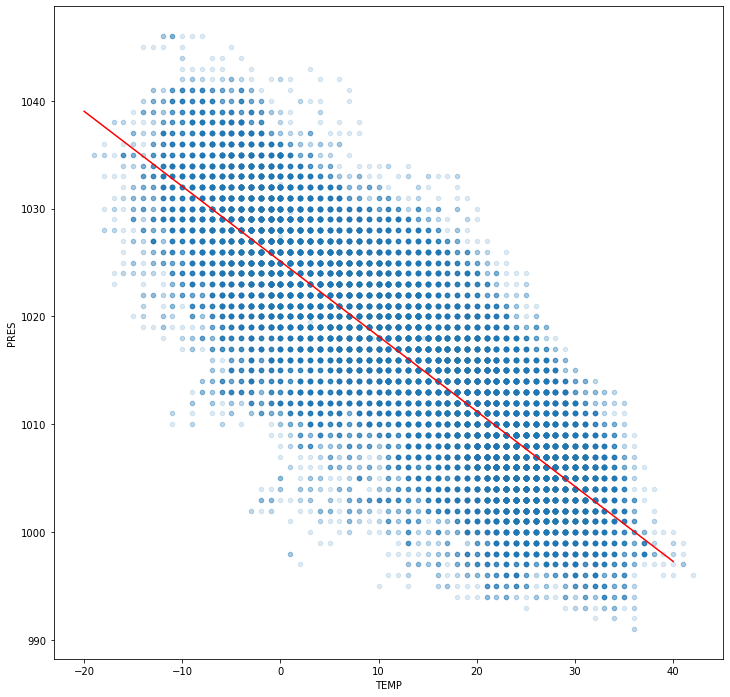

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
df.plot(x='TEMP', y='PRES', kind='scatter', alpha=0.15, ax=ax)
ax.plot(x_fit, y_fit, color='red')

We can also predict our training data, to compare the predicted *y* to the real *y* from the data.

In [22]:
y_pred = model.predict(x)

And compute the residuals.

In [23]:
y_res = y_pred - y

Use seaborn to plot the distribution of those residuals.

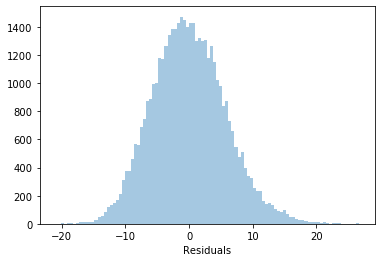

In [24]:
sns.distplot(y_res, bins=100, kde=False, axlabel='Residuals')

# Exercise 3: Perturbing perfect linear data

In this exercise, we want to look at the influence of noise and outliers on the predictions of a linear regression. To make things easier to understand, we're gonna work with synthetic data this time.

Scikit-learn has a set of functions to generate synthetic data. You can find more information about them here:

[scikit-learn.org/stable/datasets/index.html#sample-generators](https://scikit-learn.org/stable/datasets/index.html#sample-generators)

You can start playing with the generators for regression at the end of this exercise if you want, but in the meantime we're gonna use a lower-level approach with NumPy, which gives us more flexibility.

NumPy is a collection of mathematics functions which underlies all other mathematical libraries that we've been using, such as Seaborn and scikit-learn. *random* is a NumPy's module to generate random numbers from distributions.

First, we need to set up the seed, which means that our results will be reproducible.

In [25]:
np.random.seed(100)

## Step 1: Generate a perfect linear data set

Now let's define a simple linear dataset using NumPy. A uniform distribution means that all of the values that may be returned are equally likely.  When we throw dice we are sampling from a uniform distribution.

Tell Python that for *x* we want random numbers between 0 and 100 from a uniform distribution, and we want *n_samples* of them.

In [26]:
n_samples = 1000
x = np.random.uniform(0, 100, n_samples)
a = 0.75
b = 0.75
y = a*x + b

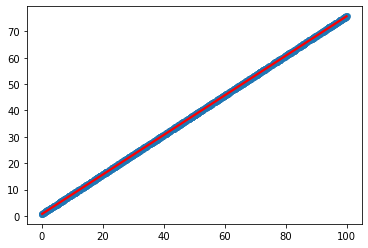

In [27]:
sns.regplot(x=x, y=y, line_kws={"color": "red"})

Scikit-learn is very powerful, but it can be a bit long to set up, especially for a problem as simple as this one. Fortunately Python offers other solutions. One is [statsmodels](https://www.statsmodels.org/stable/index.html), a module "that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration."

Here we're gonna use another widely used package for scientific computing, [SciPy](https://www.scipy.org/), and its [stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) module in particular.

In [28]:
from scipy import stats

We can look at the correlation coefficient (or Pearson coefficient).

In [29]:
stats.pearsonr(x, y)

(1.0, 0.0)

And we can fit a linear model to the data and look at a (the slope), b (the intercept), and R<sup>2</sup>.

In [30]:
stats.linregress(x, y)

LinregressResult(slope=0.7500000000000002, intercept=0.7499999999999929, rvalue=1.0, pvalue=0.0, stderr=0.0)

## Step 2: Add Gaussian noise

We had a perfect linear relationship, let's add some noise. A normal (or Gaussian) distribution returns values which are most likely to be near the mean, falling off symmetrically to either side.  It is the "bell" curve that you've seen many times.

Here, tell Python that we want the noise that we add to our simple line to have a mean of zero, and a standard deviation of 5.

In [31]:
noise_level = 5
noise = np.random.normal(0, noise_level, n_samples)
y = a*x + b + noise

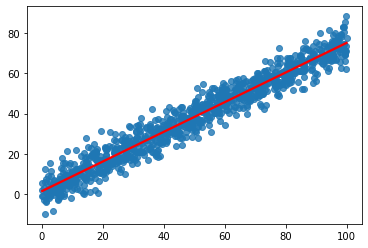

In [32]:
sns.regplot(x=x, y=y, line_kws={"color": "red"})

In [33]:
stats.pearsonr(x, y)

(0.9731804770417788, 0.0)

In [34]:
stats.linregress(x, y)

LinregressResult(slope=0.7372969490546799, intercept=1.4958174526831556, rvalue=0.9731804770417785, pvalue=0.0, stderr=0.0055168694555012355)

Use eaborn's residplot function to plot. With a normal distribution we expect to see these residuals evenly scattered around zero.

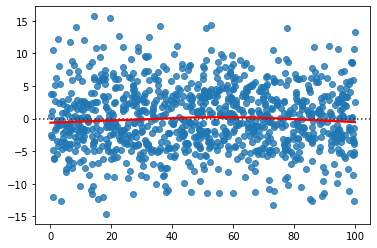

In [35]:
sns.residplot(x, y, lowess=True, line_kws={"color": "red"})

Try to run the code again with different number of samples and different level of noise. What happens?

## Step 3: Add non-Gaussian noise

Now let's see what happens when the noise isn't normally distributed. An example of a heavy tailed distribution is the gamma distribution.  This is often used to model failure likelihood for machines.  Unlike the normal distribution it is not symmetric.  In quality control applications it quickly peaks after a short lifetime, but then has a long tail that extends many years into the future.  This makes sense as we expect most failures to be early in the life of a machine because of manufacturing faults, after that the failure time is less predictable, but we all know of machines or gadgets that seem to last forever.  Google will quickly bring up examples of the shape.

Tell Python that now we want the error to follow a gamma distribution of parameters k = 2 and theta = 2.

In [36]:
noise = np.random.gamma(2, 2, n_samples)
y = a*x + b + noise

Now, plot the data and regression line with seaborn, look at the correlation coefficient and R<sup>2</sup> with stats, and the residuals with seaborn.

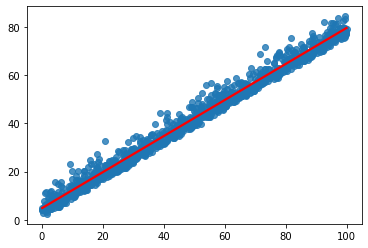

In [37]:
sns.regplot(x=x, y=y, line_kws={"color": "red"})

In [38]:
stats.pearsonr(x, y)

(0.9919556554961517, 0.0)

In [39]:
stats.linregress(x, y)

LinregressResult(slope=0.7486763066019482, intercept=4.816834876068668, rvalue=0.9919556554961518, pvalue=0.0, stderr=0.0030242780984931165)

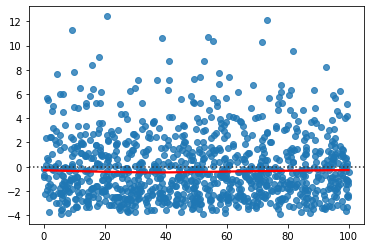

In [40]:
sns.residplot(x, y, lowess=True, line_kws={"color": "red"})

## Step 5: Add outliers

Start again with a normally distributed noise in *y*.

In [41]:
noise_level = 5
noise = np.random.normal(0, noise_level, n_samples)
y = a*x + b + noise

Let's add some outliers.

In [42]:
n_outliers = 5
x_outliers = np.random.uniform(0, 40, n_outliers)
y_outliers = np.random.uniform(80, 100, n_outliers)

x_outliers = np.concatenate((x, x_outliers))
y_outliers = np.concatenate((y, y_outliers))

Plot the data and regression line with seaborn, look at the correlation coefficient and R<sup>2</sup> with stats, and the residuals with seaborn.

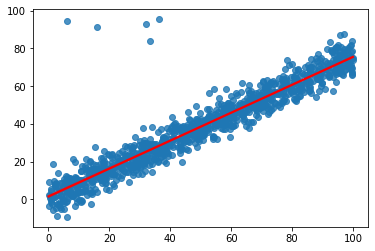

In [43]:
sns.regplot(x=x_outliers, y=y_outliers, line_kws={"color": "red"})

In [44]:
stats.pearsonr(x_outliers, y_outliers)

(0.9464236911455253, 0.0)

In [45]:
stats.linregress(x_outliers, y_outliers)

LinregressResult(slope=0.7397188672313677, intercept=1.5728191678297136, rvalue=0.9464236911455255, pvalue=0.0, stderr=0.007969585093408216)

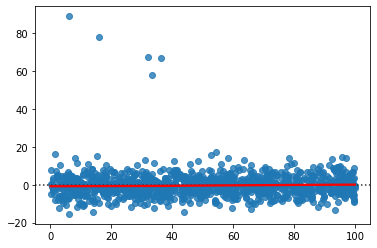

In [46]:
sns.residplot(x_outliers, y_outliers, lowess=True, line_kws={"color": "red"})

Try to change the number of outliers and their distribution for *x* and *y*, and see what happens.

## Step 5: Add a second population

Let's add another population that follows a linear relationship between *x* and *y* too, but with different parameters.

In [47]:
n_spop = 100
a_spop = 1
b_spop = 2
noise_level_spop = 1
x_spop = np.random.uniform(80, 100, n_spop)
noise_spop = np.random.normal(0, noise_level_spop, n_spop)
y_spop = a_spop*x_spop + b_spop + noise_spop

x_spop = np.concatenate((x, x_spop))
y_spop = np.concatenate((y, y_spop))

Plot the data and regression line with seaborn, look at the correlation coefficient and R<sup>2</sup> with stats, and the residuals with seaborn.

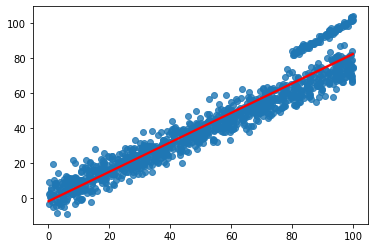

In [48]:
sns.regplot(x=x_spop, y=y_spop, line_kws={"color": "red"})

In [49]:
stats.pearsonr(x_spop, y_spop)

(0.9531079830930924, 0.0)

In [50]:
stats.linregress(x_spop, y_spop)

LinregressResult(slope=0.8414550528386049, intercept=-2.0302348078534393, rvalue=0.9531079830930923, pvalue=0.0, stderr=0.008063066273974993)

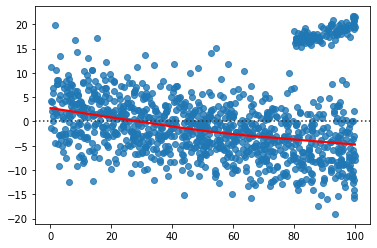

In [51]:
sns.residplot(x_spop, y_spop, lowess=True, line_kws={"color": "red"})

## Step 5: Add heteroscadistic error

Now, how would you change this code to create a heteroscadistic error?

In [52]:
noise = [np.random.normal(0, i/10) for i in x]
y = a*x + b + noise

Plot the data and regression line with seaborn, look at the correlation coefficient and R<sup>2</sup> with stats, and the residuals with seaborn.

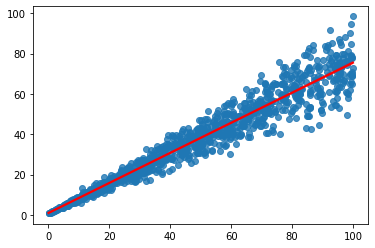

In [53]:
sns.regplot(x=x, y=y, line_kws={"color": "red"})

In [54]:
stats.pearsonr(x, y)

(0.9647598078959073, 0.0)

In [55]:
stats.linregress(x, y)

LinregressResult(slope=0.7452301430838232, intercept=0.9627313500145505, rvalue=0.9647598078959071, pvalue=0.0, stderr=0.006433981476433591)

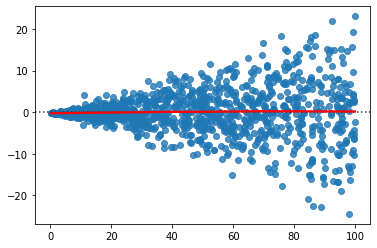

In [56]:
sns.residplot(x, y, lowess=True, line_kws={"color": "red"})